In [1]:
# import libraries
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r'C:\Users\LAPTOP WORLD\Downloads\Compressed\pandas trainnig\customer_shopping_data.csv')

In [3]:
data.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [4]:
#checking for duplicates and null values

In [5]:
data.info()
print('-------------')
data.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB
-------------


0

In [6]:
#change the invoice_date column from object to date data type 

In [7]:
data['date'] = pd.to_datetime(data['invoice_date'],dayfirst=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_no      99457 non-null  object        
 1   customer_id     99457 non-null  object        
 2   gender          99457 non-null  object        
 3   age             99457 non-null  int64         
 4   category        99457 non-null  object        
 5   quantity        99457 non-null  int64         
 6   price           99457 non-null  float64       
 7   payment_method  99457 non-null  object        
 8   invoice_date    99457 non-null  object        
 9   shopping_mall   99457 non-null  object        
 10  date            99457 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 8.3+ MB


In [9]:
#drop the old invoice date column 
data.drop(columns='invoice_date',axis=1,inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_no      99457 non-null  object        
 1   customer_id     99457 non-null  object        
 2   gender          99457 non-null  object        
 3   age             99457 non-null  int64         
 4   category        99457 non-null  object        
 5   quantity        99457 non-null  int64         
 6   price           99457 non-null  float64       
 7   payment_method  99457 non-null  object        
 8   shopping_mall   99457 non-null  object        
 9   date            99457 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 7.6+ MB


In [11]:
#checking object columns 
for i in data.select_dtypes('object'):
    print(data[i],data[i].nunique())

0        I138884
1        I317333
2        I127801
3        I173702
4        I337046
          ...   
99452    I219422
99453    I325143
99454    I824010
99455    I702964
99456    I232867
Name: invoice_no, Length: 99457, dtype: object 99457
0        C241288
1        C111565
2        C266599
3        C988172
4        C189076
          ...   
99452    C441542
99453    C569580
99454    C103292
99455    C800631
99456    C273973
Name: customer_id, Length: 99457, dtype: object 99457
0        Female
1          Male
2          Male
3        Female
4        Female
          ...  
99452    Female
99453      Male
99454      Male
99455      Male
99456    Female
Name: gender, Length: 99457, dtype: object 2
0               Clothing
1                  Shoes
2               Clothing
3                  Shoes
4                  Books
              ...       
99452           Souvenir
99453    Food & Beverage
99454    Food & Beverage
99455         Technology
99456           Souvenir
Name: category, Length:

In [12]:
#since the columns invoice_no and customer_id = to the total number of rows we will not use them in our analysis
#so we will drop those columns 
data.drop(columns=['invoice_no','customer_id'],axis=1,inplace=True)

In [13]:
#Lets ectract some usefull information from the date column that we will use them later in our analysis
data['day'] = data.date.dt.day
data['month'] = data.date.dt.month
data['year'] = data.date.dt.year
data['month/year'] = data.date.dt.to_period('M')
data['week'] = data.date.dt.isocalendar().week
data['quarter'] = data.date.dt.quarter

In [14]:
data.head()

,gender,age,category,quantity,price,payment_method,shopping_mall,date,day,month,year,month/year,week,quarter
0,Female,28,Clothing,5,1500.40,Credit Card,Kanyon,2022-08-05,5,8,2022,2022-08,31,3
1,Male,21,Shoes,3,1800.51,Debit Card,Forum Istanbul,2021-12-12,12,12,2021,2021-12,49,4
2,Male,20,Clothing,1,300.08,Cash,Metrocity,2021-11-09,9,11,2021,2021-11,45,4
3,Female,66,Shoes,5,3000.85,Credit Card,Metropol AVM,2021-05-16,16,5,2021,2021-05,19,2
4,Female,53,Books,4,60.60,Cash,Kanyon,2021-10-24,24,10,2021,2021-10,42,4


In [15]:
#let see the distribution in our numerical columns
data.describe()
    

,age,quantity,price,date,day,month,year,week,quarter
count,99457.000000,99457.000000,99457.000000,99457,99457.000000,99457.000000,99457.000000,99457.0,99457.000000
mean,43.427089,3.003429,689.256321,2022-02-04 02:46:59.783424,15.569603,6.113898,2021.629408,24.82504,2.382668
min,18.000000,1.000000,5.230000,2021-01-01 00:00:00,1.000000,1.000000,2021.000000,1.0,1.000000
25%,30.000000,2.000000,45.450000,2021-07-19 00:00:00,8.000000,3.000000,2021.000000,10.0,1.000000
50%,43.000000,3.000000,203.300000,2022-02-05 00:00:00,16.000000,6.000000,2022.000000,24.0,2.000000
75%,56.000000,4.000000,1200.320000,2022-08-22 00:00:00,23.000000,9.000000,2022.000000,38.0,3.000000
max,69.000000,5.000000,5250.000000,2023-03-08 00:00:00,31.000000,12.000000,2023.000000,53.0,4.000000
std,14.990054,1.413025,941.184567,NaN,8.799894,3.569511,0.636136,15.596746,1.148331


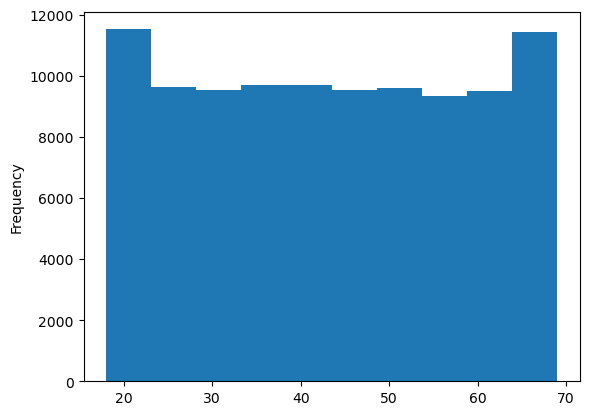

age Axes(0.125,0.11;0.775x0.77) None


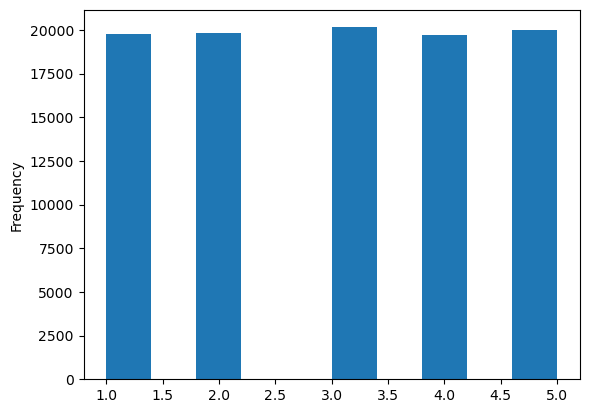

quantity Axes(0.125,0.11;0.775x0.77) None


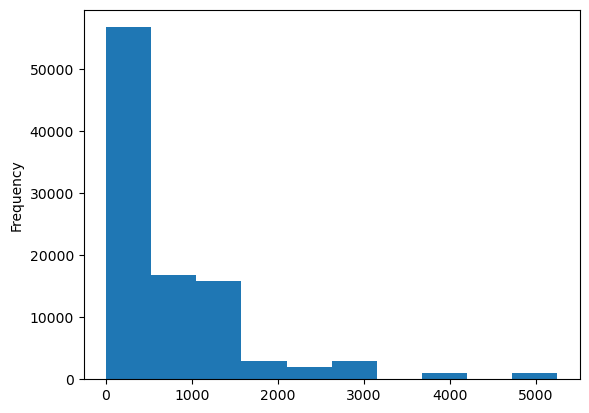

price Axes(0.125,0.11;0.775x0.77) None


In [16]:
for i in data[['age','quantity','price']]: 
    print(i,data[i].plot.hist(),plt.show())
    

In [17]:
#the price column seems to have outliers let's see 
Q1 = np.quantile(data.price,0.25)
Q3 = np.quantile(data.price,0.75)
IQR = Q3 - Q1 
Upper = Q3 + 1.5 * IQR
Lower = Q1 - 1.5 * IQR

In [18]:
data [ (data.price >= Lower) &( data.price <= Upper)]

,gender,age,category,quantity,price,payment_method,shopping_mall,date,day,month,year,month/year,week,quarter
0,Female,28,Clothing,5,1500.40,Credit Card,Kanyon,2022-08-05,5,8,2022,2022-08,31,3
1,Male,21,Shoes,3,1800.51,Debit Card,Forum Istanbul,2021-12-12,12,12,2021,2021-12,49,4
2,Male,20,Clothing,1,300.08,Cash,Metrocity,2021-11-09,9,11,2021,2021-11,45,4
4,Female,53,Books,4,60.60,Cash,Kanyon,2021-10-24,24,10,2021,2021-10,42,4
5,Female,28,Clothing,5,1500.40,Credit Card,Forum Istanbul,2022-05-24,24,5,2022,2022-05,21,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99451,Male,50,Toys,5,179.20,Cash,Metropol AVM,2021-10-09,9,10,2021,2021-10,40,4
99452,Female,45,Souvenir,5,58.65,Credit Card,Kanyon,2022-09-21,21,9,2022,2022-09,38,3
99453,Male,27,Food & Beverage,2,10.46,Cash,Forum Istanbul,2021-09-22,22,9,2021,2021-09,38,3
99454,Male,63,Food & Beverage,2,10.46,Debit Card,Metrocity,2021-03-28,28,3,2021,2021-03,12,1


In [19]:
data[ (data.price >= Lower) &( data.price <= Upper)]

,gender,age,category,quantity,price,payment_method,shopping_mall,date,day,month,year,month/year,week,quarter
0,Female,28,Clothing,5,1500.40,Credit Card,Kanyon,2022-08-05,5,8,2022,2022-08,31,3
1,Male,21,Shoes,3,1800.51,Debit Card,Forum Istanbul,2021-12-12,12,12,2021,2021-12,49,4
2,Male,20,Clothing,1,300.08,Cash,Metrocity,2021-11-09,9,11,2021,2021-11,45,4
4,Female,53,Books,4,60.60,Cash,Kanyon,2021-10-24,24,10,2021,2021-10,42,4
5,Female,28,Clothing,5,1500.40,Credit Card,Forum Istanbul,2022-05-24,24,5,2022,2022-05,21,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99451,Male,50,Toys,5,179.20,Cash,Metropol AVM,2021-10-09,9,10,2021,2021-10,40,4
99452,Female,45,Souvenir,5,58.65,Credit Card,Kanyon,2022-09-21,21,9,2022,2022-09,38,3
99453,Male,27,Food & Beverage,2,10.46,Cash,Forum Istanbul,2021-09-22,22,9,2021,2021-09,38,3
99454,Male,63,Food & Beverage,2,10.46,Debit Card,Metrocity,2021-03-28,28,3,2021,2021-03,12,1


In [20]:
data[ (data.price >= Lower) &( data.price <= Upper)].describe()

,age,quantity,price,date,day,month,year,week,quarter
count,94433.000000,94433.000000,94433.000000,94433,94433.000000,94433.000000,94433.000000,94433.0,94433.000000
mean,43.430813,2.929177,528.129519,2022-02-03 21:36:03.934218240,15.575530,6.109887,2021.629134,24.810416,2.381456
min,18.000000,1.000000,5.230000,2021-01-01 00:00:00,1.000000,1.000000,2021.000000,1.0,1.000000
25%,30.000000,2.000000,40.660000,2021-07-19 00:00:00,8.000000,3.000000,2021.000000,10.0,1.000000
50%,43.000000,3.000000,203.300000,2022-02-04 00:00:00,16.000000,6.000000,2022.000000,24.0,2.000000
75%,56.000000,4.000000,900.240000,2022-08-21 00:00:00,23.000000,9.000000,2022.000000,38.0,3.000000
max,69.000000,5.000000,2400.680000,2023-03-08 00:00:00,31.000000,12.000000,2023.000000,53.0,4.000000
std,14.996378,1.399855,614.205417,NaN,8.800091,3.570952,0.636085,15.604448,1.148548


In [21]:
data[data['price'] > Upper].select_dtypes('object').describe()

,gender,category,payment_method,shopping_mall
count,5024,5024,5024,5024
unique,2,2,3,10
top,Female,Technology,Cash,Mall of Istanbul
freq,2973,3011,2248,1020


In [22]:
data[data['price'] > Upper]

,gender,age,category,quantity,price,payment_method,shopping_mall,date,day,month,year,month/year,week,quarter
3,Female,66,Shoes,5,3000.85,Credit Card,Metropol AVM,2021-05-16,16,5,2021,2021-05,19,2
15,Male,24,Shoes,5,3000.85,Credit Card,Viaport Outlet,2021-11-07,7,11,2021,2021-11,44,4
23,Male,44,Technology,5,5250.00,Cash,Kanyon,2021-10-26,26,10,2021,2021-10,43,4
53,Female,43,Technology,4,4200.00,Cash,Metrocity,2022-02-22,22,2,2022,2022-02,8,1
69,Female,44,Technology,5,5250.00,Credit Card,Mall of Istanbul,2021-11-19,19,11,2021,2021-11,46,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99332,Female,53,Shoes,5,3000.85,Credit Card,Metrocity,2022-03-13,13,3,2022,2022-03,10,1
99374,Male,36,Technology,3,3150.00,Credit Card,Metropol AVM,2021-12-24,24,12,2021,2021-12,51,4
99387,Male,33,Technology,3,3150.00,Credit Card,Kanyon,2022-08-01,1,8,2022,2022-08,31,3
99424,Female,34,Technology,3,3150.00,Cash,Metrocity,2021-01-13,13,1,2021,2021-01,2,1


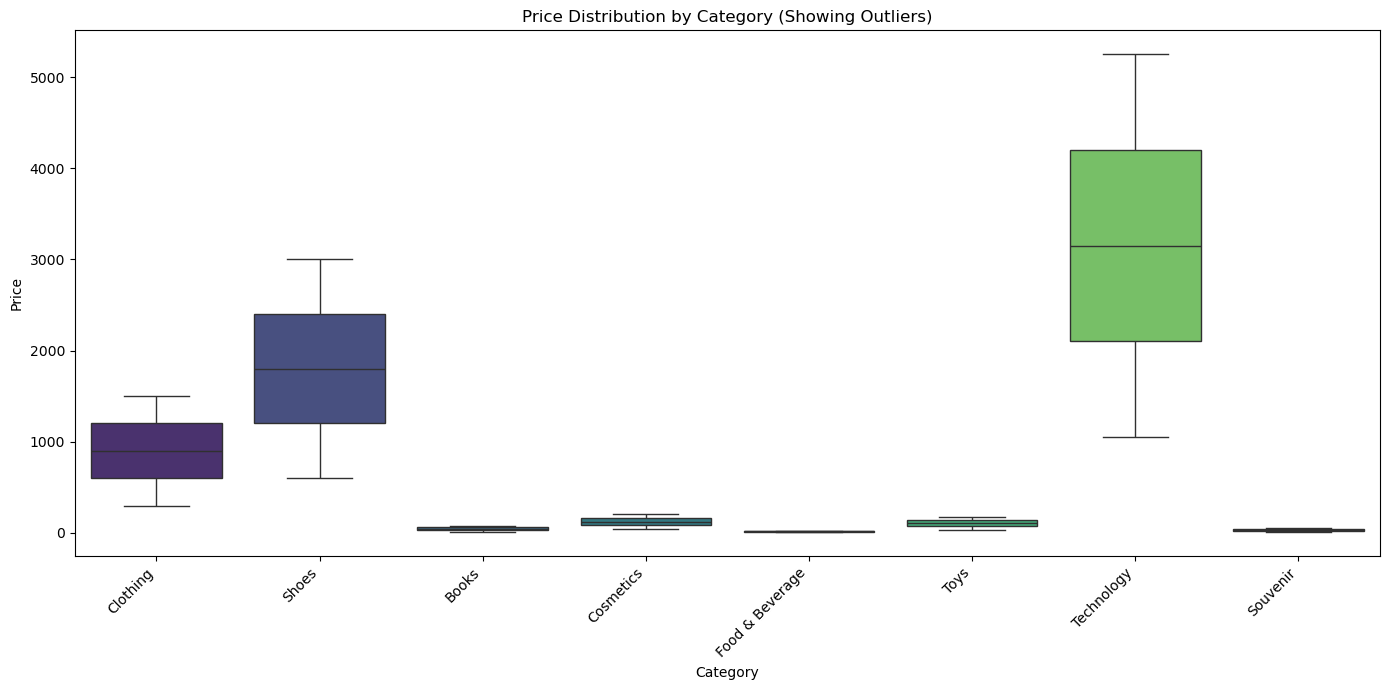

In [23]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=data, 
            x='category', 
            y='price', 
            palette='viridis')

plt.title('Price Distribution by Category (Showing Outliers)')
plt.xlabel('Category')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [24]:
# we saw that the outliers in the Technology and shoes category with a minmum quantity of 3 and a minimum price of 3000$
# it's a huge difference between normal data without outlier see the mean in price was 528 and the minimum quantity was 1

In [25]:
#Let's explore our categorical columns 

In [26]:

data.gender.value_counts()
for i in data.select_dtypes('object').columns: 
    print(data[i].value_counts())


gender
Female    59482
Male      39975
Name: count, dtype: int64
category
Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: count, dtype: int64
payment_method
Cash           44447
Credit Card    34931
Debit Card     20079
Name: count, dtype: int64
shopping_mall
Mall of Istanbul     19943
Kanyon               19823
Metrocity            15011
Metropol AVM         10161
Istinye Park          9781
Zorlu Center          5075
Cevahir AVM           4991
Forum Istanbul        4947
Viaport Outlet        4914
Emaar Square Mall     4811
Name: count, dtype: int64


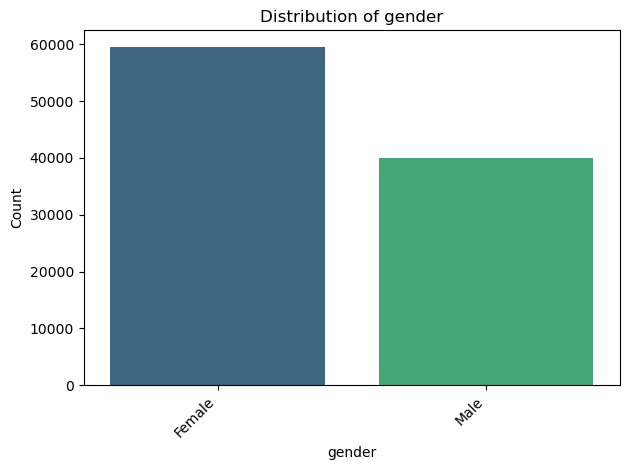

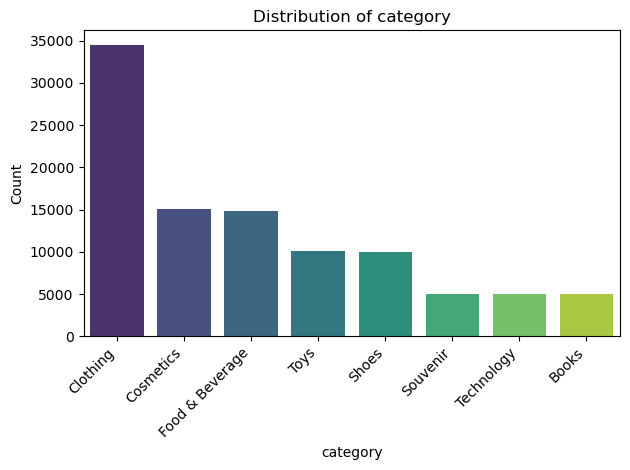

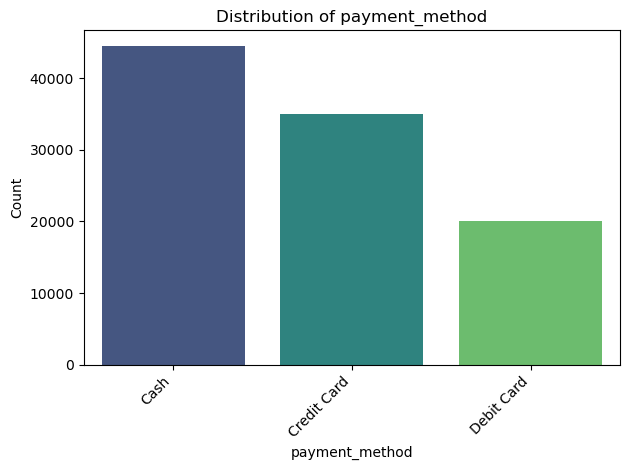

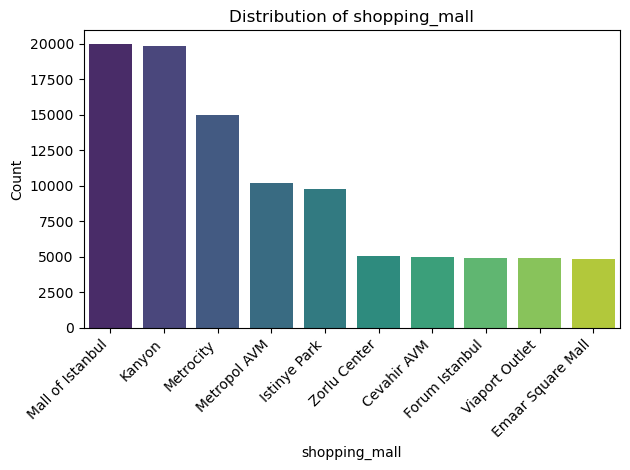

In [27]:
for col in data.select_dtypes('object').columns:
    sns.countplot(data=data, x=col, palette='viridis',order=data[col].value_counts().index)
    
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout() 
    plt.show()

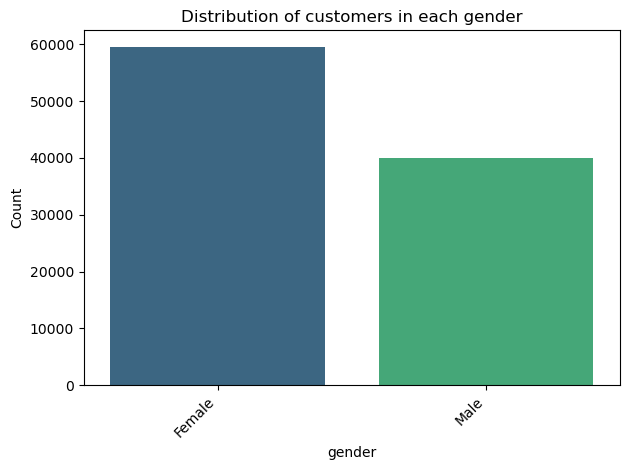

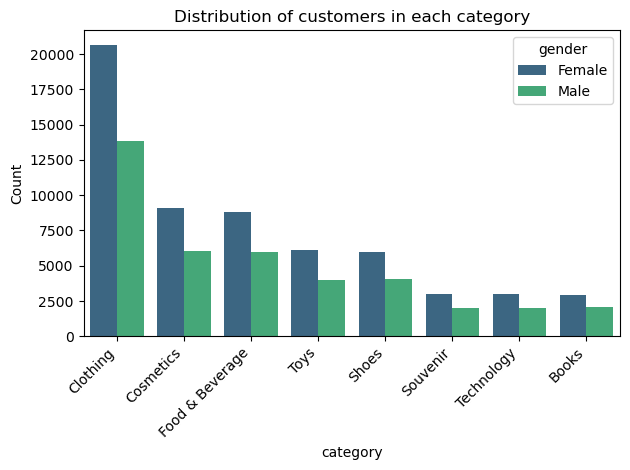

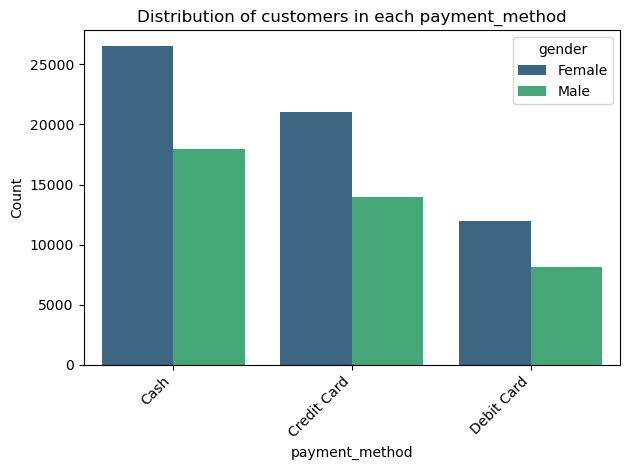

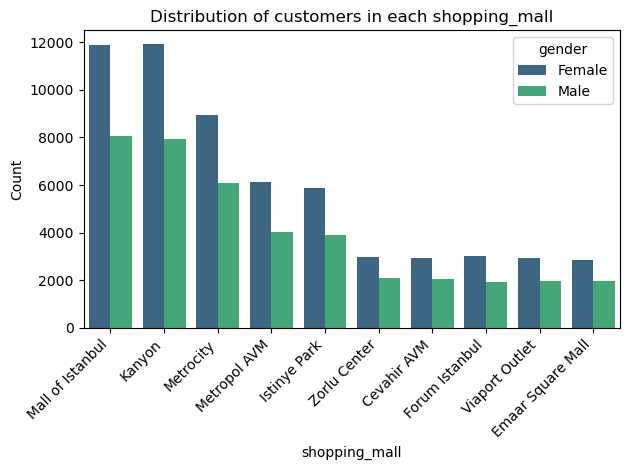

In [28]:
for col in data.select_dtypes('object').columns:
    sns.countplot(data=data, x=col, palette='viridis',hue='gender',order=data[col].value_counts().index)
    
    plt.title(f'Distribution of customers in each {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout() 
    plt.show()

In [29]:
#we found that we have around 60% of our customers were female, the top category was clothes, top payment method used is cash
#and the top mall is Mall of istanbul

In [30]:
# let's make some multi-variant analysis
pd.crosstab(data.gender,data.category)

category,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys
gender,,,,,,,,
Female,2906,20652,9070,8804,5967,3017,2981,6085
Male,2075,13835,6027,5972,4067,1982,2015,4002


In [31]:
pd.crosstab(data.gender,data.quantity)

quantity,1,2,3,4,5
gender,,,,,
Female,11824,11812,12046,11927,11873
Male,7943,8016,8103,7796,8117


In [32]:
data.groupby("gender").price.agg(['min','max','mean','sum']) 

,min,max,mean,sum
gender,,,,
Female,5.23,5250.0,688.137615,40931801.62
Male,5.23,5250.0,690.920933,27619564.29


In [33]:
pd.crosstab(data.gender,data.shopping_mall)

shopping_mall,Cevahir AVM,Emaar Square Mall,Forum Istanbul,Istinye Park,Kanyon,Mall of Istanbul,Metrocity,Metropol AVM,Viaport Outlet,Zorlu Center
gender,,,,,,,,,,
Female,2940,2842,3016,5874,11906,11902,8941,6144,2949,2968
Male,2051,1969,1931,3907,7917,8041,6070,4017,1965,2107


In [34]:
pd.crosstab(data.gender,data.payment_method)

payment_method,Cash,Credit Card,Debit Card
gender,,,
Female,26509,21011,11962
Male,17938,13920,8117


In [35]:
pd.crosstab(data.gender,data.year)

year,2021,2022,2023
gender,,,
Female,27156,27192,5134
Male,18226,18359,3390


In [36]:
pd.crosstab(data.month,data.gender)

gender,Female,Male
month,,
1,6923,4685
2,6252,4230
3,5248,3482
4,4481,3006
5,4649,3048
6,4518,3063
7,4723,3154
8,4567,3068
9,4404,2949


In [37]:
pd.crosstab(data['month/year'],data.gender)

gender,Female,Male
month/year,,
2021-01,2268,1567
2021-02,2037,1370
2021-03,2315,1498
2021-04,2244,1480
2021-05,2287,1561
2021-06,2255,1528
2021-07,2404,1580
2021-08,2261,1462
2021-09,2184,1486


In [38]:
data.groupby('category').age.agg(['min','max','mean','count']).sort_values(by='count')

,min,max,mean,count
category,,,,
Books,18,69,43.541859,4981
Technology,18,69,43.368495,4996
Souvenir,18,69,43.393079,4999
Shoes,18,69,43.454953,10034
Toys,18,69,43.326262,10087
Food & Beverage,18,69,43.354426,14776
Cosmetics,18,69,43.580645,15097
Clothing,18,69,43.409227,34487


In [39]:
data['age_group_labeled'] = pd.cut(data.age , bins= [18,25,35,45,55,60,70],labels = [ 'Young Adult (19-25)','Adult (26-35)','Mid-Adult (36-45)',
                                                                                     'Middle-Aged (46-55)', 'Older Adult (56-60)',  'Senior (61-70)'])

In [40]:
data.head()

,gender,age,category,quantity,price,payment_method,shopping_mall,date,day,month,year,month/year,week,quarter,age_group_labeled
0,Female,28,Clothing,5,1500.40,Credit Card,Kanyon,2022-08-05,5,8,2022,2022-08,31,3,Adult (26-35)
1,Male,21,Shoes,3,1800.51,Debit Card,Forum Istanbul,2021-12-12,12,12,2021,2021-12,49,4,Young Adult (19-25)
2,Male,20,Clothing,1,300.08,Cash,Metrocity,2021-11-09,9,11,2021,2021-11,45,4,Young Adult (19-25)
3,Female,66,Shoes,5,3000.85,Credit Card,Metropol AVM,2021-05-16,16,5,2021,2021-05,19,2,Senior (61-70)
4,Female,53,Books,4,60.60,Cash,Kanyon,2021-10-24,24,10,2021,2021-10,42,4,Middle-Aged (46-55)


In [41]:
data.groupby('age_group_labeled').price.agg(['min','max','mean','sum','count'])

,min,max,mean,sum,count
age_group_labeled,,,,,
Young Adult (19-25),5.23,5250.0,683.189701,9233308.81,13515
Adult (26-35),5.23,5250.0,687.410483,13101356.40,19059
Mid-Adult (36-45),5.23,5250.0,699.923693,13603716.89,19436
Middle-Aged (46-55),5.23,5250.0,691.896191,13157097.96,19016
Older Adult (56-60),5.23,5250.0,680.361127,6407641.09,9418
Senior (61-70),5.23,5250.0,689.427523,11836781.14,17169


In [42]:
pd.crosstab(data.shopping_mall,data.gender,values=data.price,aggfunc=('median','sum','count'))

count        median                 sum            
gender            Female  Male  Female    Male      Female        Male
shopping_mall                                                         
Cevahir AVM         2940  2051  203.30  203.30  2049043.93  1384627.91
Emaar Square Mall   2842  1969  300.08  300.08  2020531.60  1369876.71
Forum Istanbul      3016  1931  203.30  203.30  1974614.27  1361459.55
Istinye Park        5874  3907  203.30  203.30  4042404.99  2674672.55
Kanyon             11906  7917  203.30  203.30  8245629.46  5465125.78
Mall of Istanbul   11902  8041  203.30  300.08  8182065.53  5669672.09
Metrocity           8941  6070  203.30  300.08  6104891.02  4145089.05
Metropol AVM        6144  4017  203.30  300.08  4058412.39  2879580.60
Viaport Outlet      2949  1965  300.08  203.30  2110649.80  1303369.66
Zorlu Center        2968  2107  300.08  203.30  2143558.63  1366090.39

In [43]:
pd.crosstab(data.shopping_mall,data.payment_method,values=data.price,aggfunc=('sum'))

payment_method,Cash,Credit Card,Debit Card
shopping_mall,,,
Cevahir AVM,1519323.38,1202292.16,712056.30
Emaar Square Mall,1546176.25,1166797.40,677434.66
Forum Istanbul,1429764.28,1183614.05,722695.49
Istinye Park,3012008.82,2386228.05,1318840.67
Kanyon,6205221.67,4660884.63,2844648.94
Mall of Istanbul,6241779.56,4842875.83,2767082.23
Metrocity,4552782.39,3677033.18,2020164.50
Metropol AVM,3103319.49,2450575.98,1384097.52
Viaport Outlet,1545471.68,1211440.88,657106.90


In [44]:
pd.crosstab([data.shopping_mall,data.gender],data.year,values=data.price,aggfunc=('sum'))

year                            2021        2022       2023
shopping_mall     gender                                   
Cevahir AVM       Female   953846.89   910725.03  184472.01
                  Male     622619.52   664272.64   97735.75
Emaar Square Mall Female   973850.48   878717.25  167963.87
                  Male     654102.17   607976.70  107797.84
Forum Istanbul    Female   882748.96   932839.13  159026.18
                  Male     635140.65   625025.93  101292.97
Istinye Park      Female  1870168.88  1871239.40  300996.71
                  Male    1183907.00  1242647.40  248118.15
Kanyon            Female  3750340.06  3779011.58  716277.82
                  Male    2509741.43  2460303.85  495080.50
Mall of Istanbul  Female  3785567.28  3756050.98  640447.27
                  Male    2541926.19  2604222.58  523523.32
Metrocity         Female  2721609.39  2841057.63  542224.00
                  Male    1875370.35  1896549.91  373168.79
Metropol AVM      Female  1867398.31  1828336.71  362677.37
                  Male    1375272.32  1274316.33  229991.95
Viaport Outlet    Female   960988.00   966280.27  183381.53
                  Male     597840.64   613812.00   91717.02
Zorlu Center      Female   966202.25   966882.27  210474.11
                  Male     587663.86   652558.59  125867.94

In [45]:
pd.crosstab([data.shopping_mall,data.gender],data.category,values=data.price,aggfunc=('sum'))

category                     Books    Clothing  Cosmetics  Food & Beverage  \
shopping_mall     gender                                                     
Cevahir AVM       Female   6726.60   927547.28   53630.54          6940.21   
                  Male     5272.20   626867.12   34764.30          5052.18   
Emaar Square Mall Female   6953.85   860329.36   56924.00          6045.88   
                  Male     4105.65   651473.68   35455.52          4984.19   
Forum Istanbul    Female   6999.30   961156.24   58591.06          6459.05   
                  Male     4454.10   610962.88   36634.66          4377.51   
Istinye Park      Female  11983.65  1864697.12  105797.32         13739.21   
                  Male     8741.55  1185616.08   72944.04          9680.73   
Kanyon            Female  25679.25  3742897.84  221556.34         27452.27   
                  Male    19301.10  2412643.20  150685.96         18022.58   
Mall of Istanbul  Female  27436.65  3726693.52  224768.48         27870.67   
                  Male    19513.20  2518871.52  149018.90         18561.27   
Metrocity         Female  20240.40  2821352.16  161460.86         21171.04   
                  Male    14165.25  1898606.16  110961.14         14204.68   
Metropol AVM      Female  13347.15  1896805.68  110920.48         14806.13   
                  Male     8893.05  1269638.48   74855.06          9178.65   
Viaport Outlet    Female   6514.50   905041.28   56517.40          6746.70   
                  Male     4393.50   625666.80   36146.74          4686.08   
Zorlu Center      Female   7075.05   910142.64   58265.78          6642.10   
                  Male     5181.30   658675.60   38708.32          4947.58   

category                       Shoes  Souvenir  Technology       Toys  
shopping_mall     gender                                               
Cevahir AVM       Female   564159.80   4480.86    452550.0   33008.64  
                  Male     319890.61   3823.98    366450.0   22507.52  
Emaar Square Mall Female   526949.26   4797.57    527100.0   31431.68  
                  Male     344497.58   3718.41    307650.0   17991.68  
Forum Istanbul    Female   484337.19   5477.91    414750.0   36843.52  
                  Male     391310.84   3612.84    291900.0   18206.72  
Istinye Park      Female  1052698.18  10639.11    913500.0   69350.40  
                  Male     753813.52   7730.07    596400.0   39746.56  
Kanyon            Female  2127002.48  21583.20   1950900.0  128558.08  
                  Male    1513028.57  13900.05   1251600.0   85944.32  
Mall of Istanbul  Female  2139606.05  21020.16   1884750.0  129920.00  
                  Male    1528632.99  13243.17   1335600.0   86231.04  
Metrocity         Female  1543637.24  16375.08   1421700.0   98954.24  
                  Male    1066502.09   9395.73    964950.0   66304.00  
Metropol AVM      Female  1139122.66  11741.73    803250.0   68418.56  
                  Male     803627.63   6862.05    662550.0   43975.68  
Viaport Outlet    Female   562959.46   4387.02    536550.0   31933.44  
                  Male     319890.61   3249.21    286650.0   22686.72  
Zorlu Center      Female   606171.70   4785.84    520800.0   29675.52  
                  Male     347498.43   3612.84    282450.0   25016.32

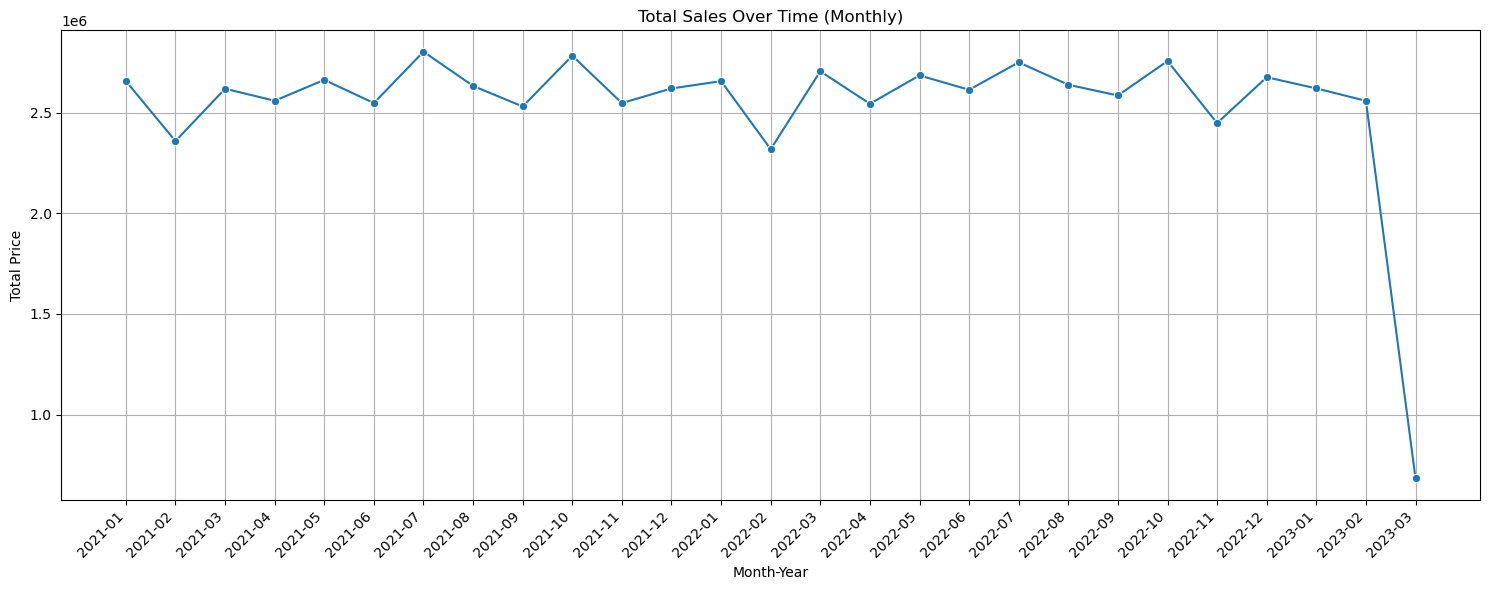

In [46]:
# Let's see the sales over time
data['month_year_str'] = data['month/year'].astype(str)

monthly_sales = data.groupby('month_year_str')['price'].sum().reset_index()

# دلوقتي نرسم الـ Line Plot
plt.figure(figsize=(15, 6))
sns.lineplot(data=monthly_sales, 
             x='month_year_str', 
             y='price', 
             marker='o')
plt.title('Total Sales Over Time (Monthly)')
plt.xlabel('Month-Year')
plt.ylabel('Total Price')
plt.xticks(rotation=45, ha='right')  
plt.grid(True) 
plt.tight_layout()
plt.show()